Importing Libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [2]:
data=pd.read_csv(r"D:\ICT Academy\TCS internship\Activity Report\salarydata.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA 

In [3]:
data.shape

(32561, 14)

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

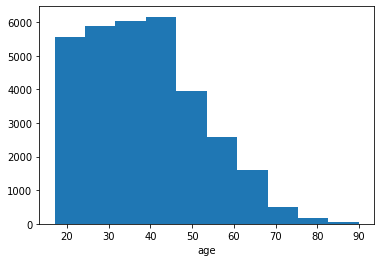

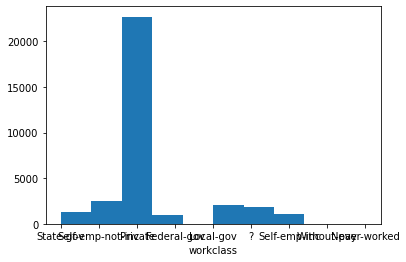

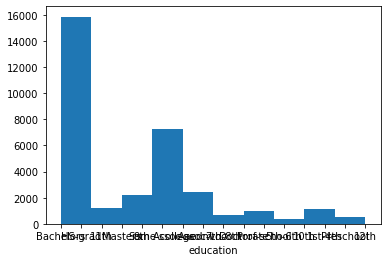

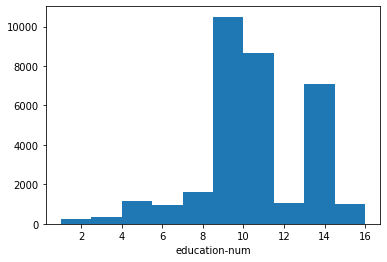

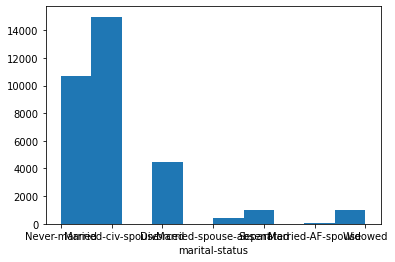

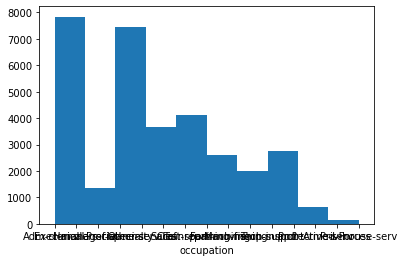

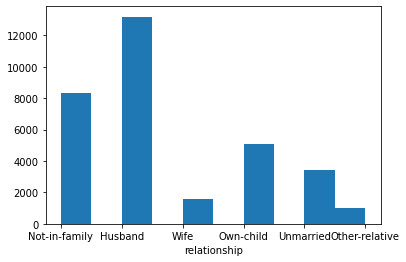

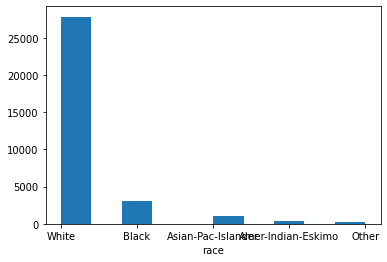

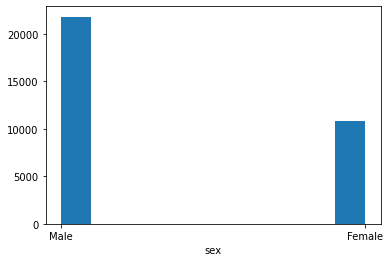

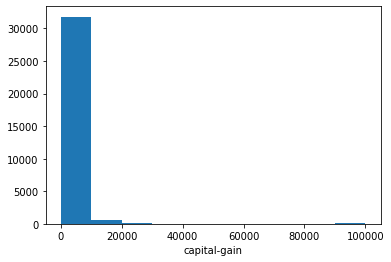

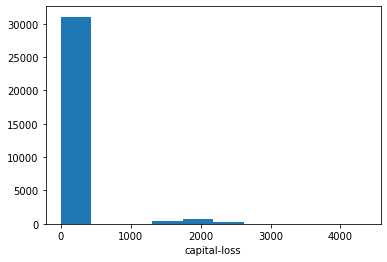

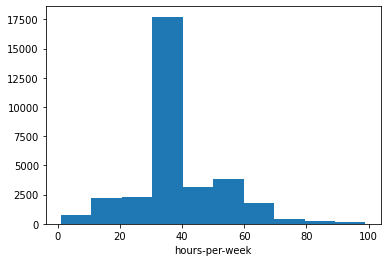

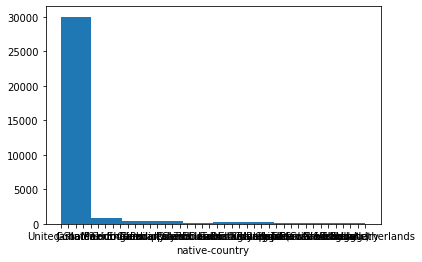

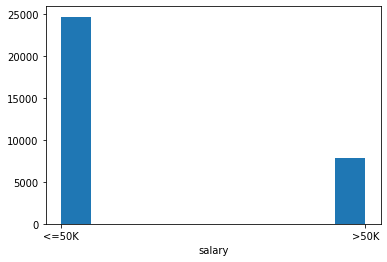

In [5]:
cols=data.columns
for i in cols:
    plt.hist(data[i])
    plt.xlabel(i)
    plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Preprocessing

In [9]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#checking for unique values to find any invalid data is present in it 
cols=data.columns
for i in cols:
    print(i)
    print(data[i].nunique())
    print(data[i].unique())

age
73
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
16
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
7
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
15
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

In [11]:
#replacing the invalid data  with null values
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [12]:
#handling duplicate values
duplicateindex=data[data.duplicated()].index

In [13]:
duplicateindex

Int64Index([  352,   391,   563,   570,   673,   864,   944,  1042,  1050,
             1078,
            ...
            32455, 32480, 32482, 32484, 32485, 32503, 32512, 32527, 32557,
            32559],
           dtype='int64', length=3465)

In [14]:
#droping duplicate values
data=data.drop(duplicateindex,axis=0)

In [15]:
#checking for null values
data.isnull().sum()

age                  0
workclass         1632
education            0
education-num        0
marital-status       0
occupation        1639
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     580
salary               0
dtype: int64

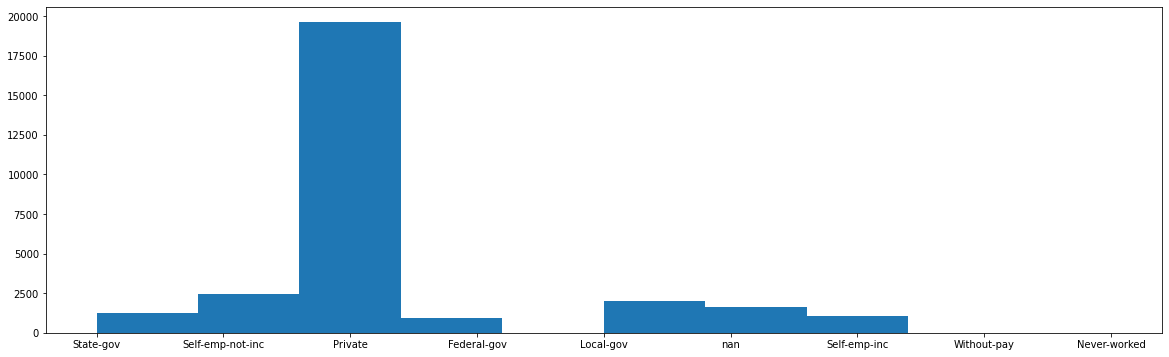

In [16]:
#histogram of workclass
data['workclass']=data['workclass'].astype(str)
plt.subplots(figsize=(20,6))
plt.hist(data['workclass'])
plt.show()

In [17]:
#handling null values present within the dataset
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['workclass']=data['workclass'].fillna(data['workclass'].mode()[0])
data['native-country']=data['native-country'].fillna(data['native-country'].mode()[0])
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
#recheckign for any invalid data
cols=data.columns
for i in cols:
    print(i)
    print(data[i].nunique())
    print(data[i].unique())

age
73
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' 'nan'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
16
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
7
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
14
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
r

In [20]:
#found nan present in workclass as string replaceing nana with mode values
data['workclass']=data['workclass'].replace('nan',data['workclass'].mode()[0])

In [21]:
#reverifing whether all the invalid data are corrected
cols=data.columns
for i in cols:
    print(i)
    print(data[i].nunique())
    print(data[i].unique())

age
73
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
8
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
16
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
7
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
14
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relatio

In [22]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


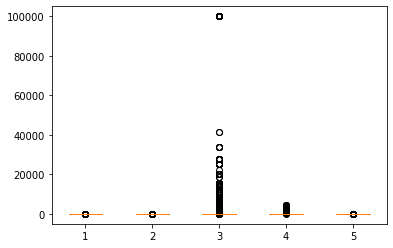

In [23]:
#checking for outliers
numericcols=['age','education-num','capital-gain','capital-loss','hours-per-week']
plt.boxplot(data[numericcols])
plt.show()

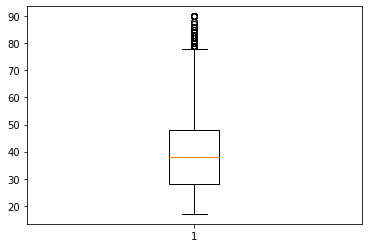

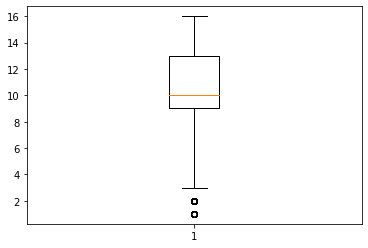

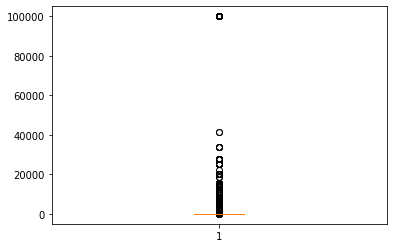

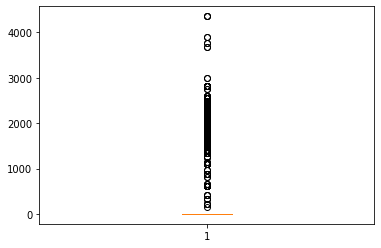

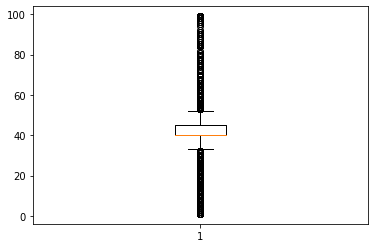

In [24]:
for i in numericcols:
    plt.boxplot(data[i])
    plt.show()

In [25]:
#fuction to deal with outlier
def outlier(x):
    q1=np.percentile(x,25,interpolation='midpoint')
    q2=np.percentile(x,50,interpolation='midpoint')
    q3=np.percentile(x,75,interpolation='midpoint')
    IQR=q3-q1
    upper=1.5*IQR+q3
    lower=q1-1.5*IQR
    x=np.where(x>upper,upper,np.where(x<lower,lower,x))
    return x

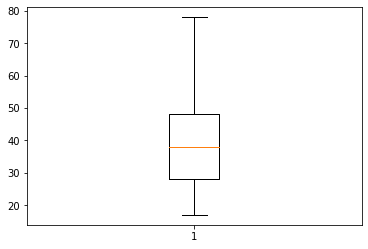

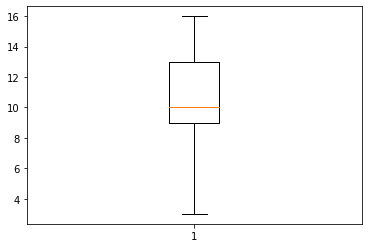

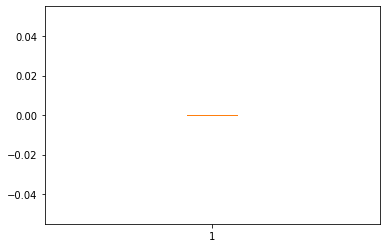

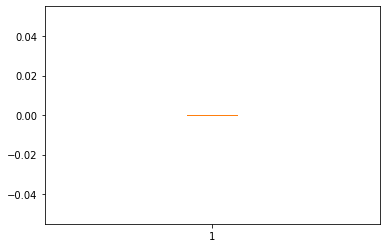

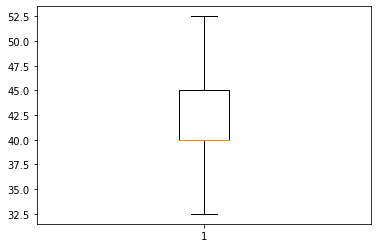

In [26]:
#handling the outliers present and creating boxplot
for i in numericcols:
    data[i]=outlier(data[i])
    plt.boxplot(data[i])
    plt.show()

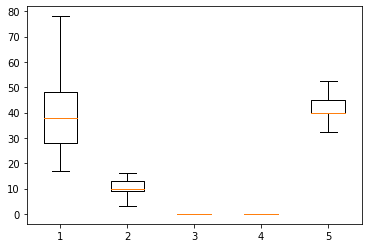

In [27]:
plt.boxplot(data[numericcols])
plt.show()

In [28]:
#encoding of other varibale other than numerical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [29]:
data['workclass']=LE.fit_transform(data['workclass'])
data['education']=LE.fit_transform(data['education'])
data['marital-status']=LE.fit_transform(data['marital-status'])
data['occupation']=LE.fit_transform(data['occupation'])
data['relationship']=LE.fit_transform(data['relationship'])
data['race']=LE.fit_transform(data['race'])
data['sex']=LE.fit_transform(data['sex'])
data['native-country']=LE.fit_transform(data['native-country'])

In [30]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,6,9,13.0,4,0,1,4,1,0.0,0.0,40.0,38,<=50K
1,50.0,5,9,13.0,2,3,0,4,1,0.0,0.0,32.5,38,<=50K
2,38.0,3,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,<=50K
3,53.0,3,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,<=50K
4,28.0,3,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,<=50K


<AxesSubplot:>

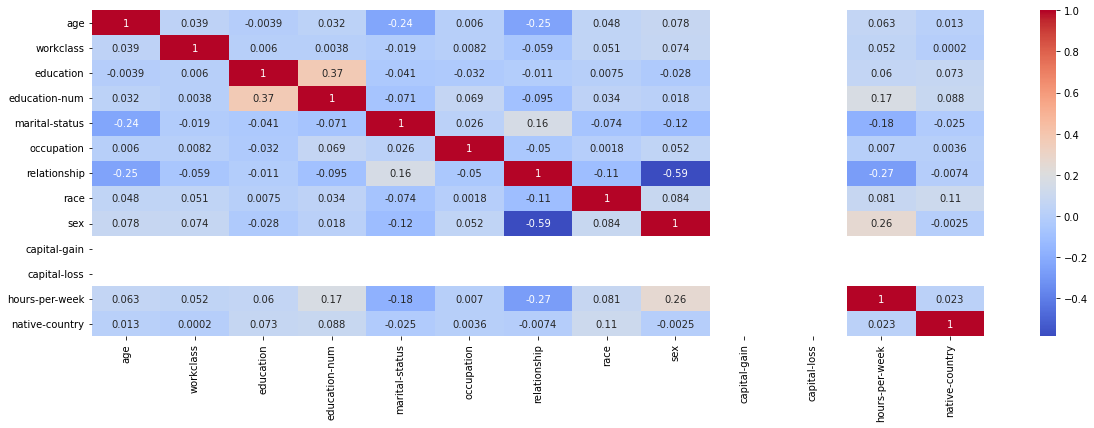

In [31]:
#checking for non correlated values within the data
corr=data.corr()
plt.subplots(figsize=(20,6))
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [32]:
#removal of non co-related columns
data=data.drop(['capital-gain','capital-loss'],axis=1)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39.0,6,9,13.0,4,0,1,4,1,40.0,38,<=50K
1,50.0,5,9,13.0,2,3,0,4,1,32.5,38,<=50K
2,38.0,3,11,9.0,0,5,1,4,1,40.0,38,<=50K
3,53.0,3,1,7.0,2,5,0,2,1,40.0,38,<=50K
4,28.0,3,9,13.0,2,9,5,2,0,40.0,4,<=50K


In [33]:
#checking shape of the data set after preprocessing
data.shape

(29096, 12)

In [34]:
#columns after preprocessing
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'salary'],
      dtype='object')

In [35]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39.0,6,9,13.0,4,0,1,4,1,40.0,38,<=50K
1,50.0,5,9,13.0,2,3,0,4,1,32.5,38,<=50K
2,38.0,3,11,9.0,0,5,1,4,1,40.0,38,<=50K
3,53.0,3,1,7.0,2,5,0,2,1,40.0,38,<=50K
4,28.0,3,9,13.0,2,9,5,2,0,40.0,4,<=50K
